#### **TRABALHO 2 - APRENDIZADO DE MÁQUINA - DataSet Colleges**

In [ ]:
    # Integrantes:
    # Vinicius Moraes - Número USP: 15642432
    # Isaac Ferreira Souza Santos - Número USP: 15637912
    # Victória Favero - Número USP: 15698302
    # Camila Aya - Número USP: 15635649

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Carregando o dataset
url = 'https://raw.githubusercontent.com/vifavero/dataset/main/facul_filtrada.csv'
data = pd.read_csv(url)

In [ ]:
# selecionando as colunas de interesse
colunas_interesse = ['percent_black', 'percent_white', 'percent_hispanic', 'percent_asian']
dado_selecionado = data[colunas_interesse]


In [ ]:
# calculando estatistica descritivas
estatistica_descr = dado_selecionado.describe()
print(estatistica_descr)

       percent_black  percent_white  percent_hispanic  percent_asian
count      42.000000      42.000000         42.000000      42.000000
mean        0.113326       0.402983          0.227890       0.016707
std         0.077789       0.179077          0.128059       0.014134
min         0.000000       0.027500          0.017200       0.000000
25%         0.060025       0.290200          0.138625       0.006025
50%         0.088500       0.423900          0.232900       0.012900
75%         0.162600       0.525650          0.312600       0.024750
max         0.315800       0.846200          0.542900       0.056300


In [ ]:
# estilo de grafico
sns.set(style="whitegrid")


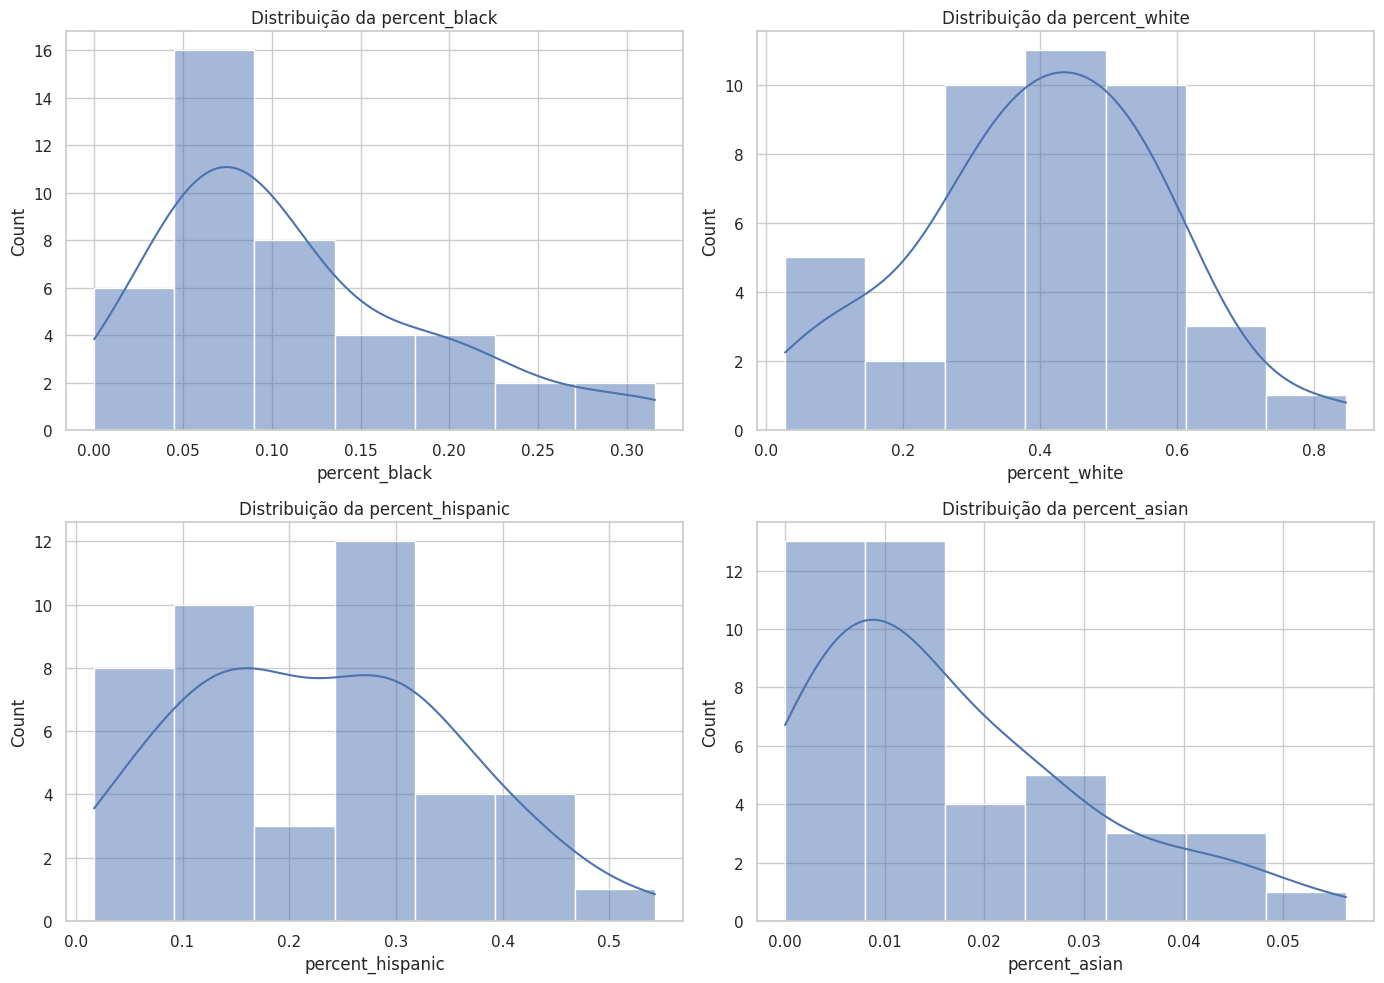

In [ ]:
# Plotar histogramas para cada atributo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data['percent_black'], kde=True, ax=axes[0, 0]).set_title('Distribuição da percent_black')
sns.histplot(data['percent_white'], kde=True, ax=axes[0, 1]).set_title('Distribuição da percent_white')
sns.histplot(data['percent_hispanic'], kde=True, ax=axes[1, 0]).set_title('Distribuição da percent_hispanic')
sns.histplot(data['percent_asian'], kde=True, ax=axes[1, 1]).set_title('Distribuição da percent_asian')
plt.tight_layout()
plt.show()

In [ ]:
# definindo atributos e alvos
X = dado_selecionado[['percent_white', 'percent_hispanic', 'percent_asian']]
y = dado_selecionado['percent_black']

In [ ]:
# dividindo  os dados em treino e teste
# treina cada atributo para ao alvo
#vamos explicar a partir do treino vimos que a medida que os brancos crescem crescem os negros descrecem
#iiso acontece para todos - verificar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# inicializando  e treinando o modelo k-NN
#os cinco vizinhos são de acordo com os dados selecionados + o alvo
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Fazendo previsões e calculando o erro quadrático médio
# mostra a eficacia do modelo criado - criterio de validação
# quanto mais proximo do 0 melhor
y_pred = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred)
print(f"MSE do k-NN: {mse_knn}")

MSE do k-NN: 0.005093565169230768


In [ ]:
# Aplicando k-means sendo k=4
kmeans = KMeans(n_clusters=4, n_init ='auto',random_state=42)
dado_selecionado.loc[:,'cluster'] = kmeans.fit_predict(dado_selecionado)

<ipython-input-11-928044a07c8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dado_selecionado.loc[:,'cluster'] = kmeans.fit_predict(dado_selecionado)


<Figure size 1000x800 with 0 Axes>

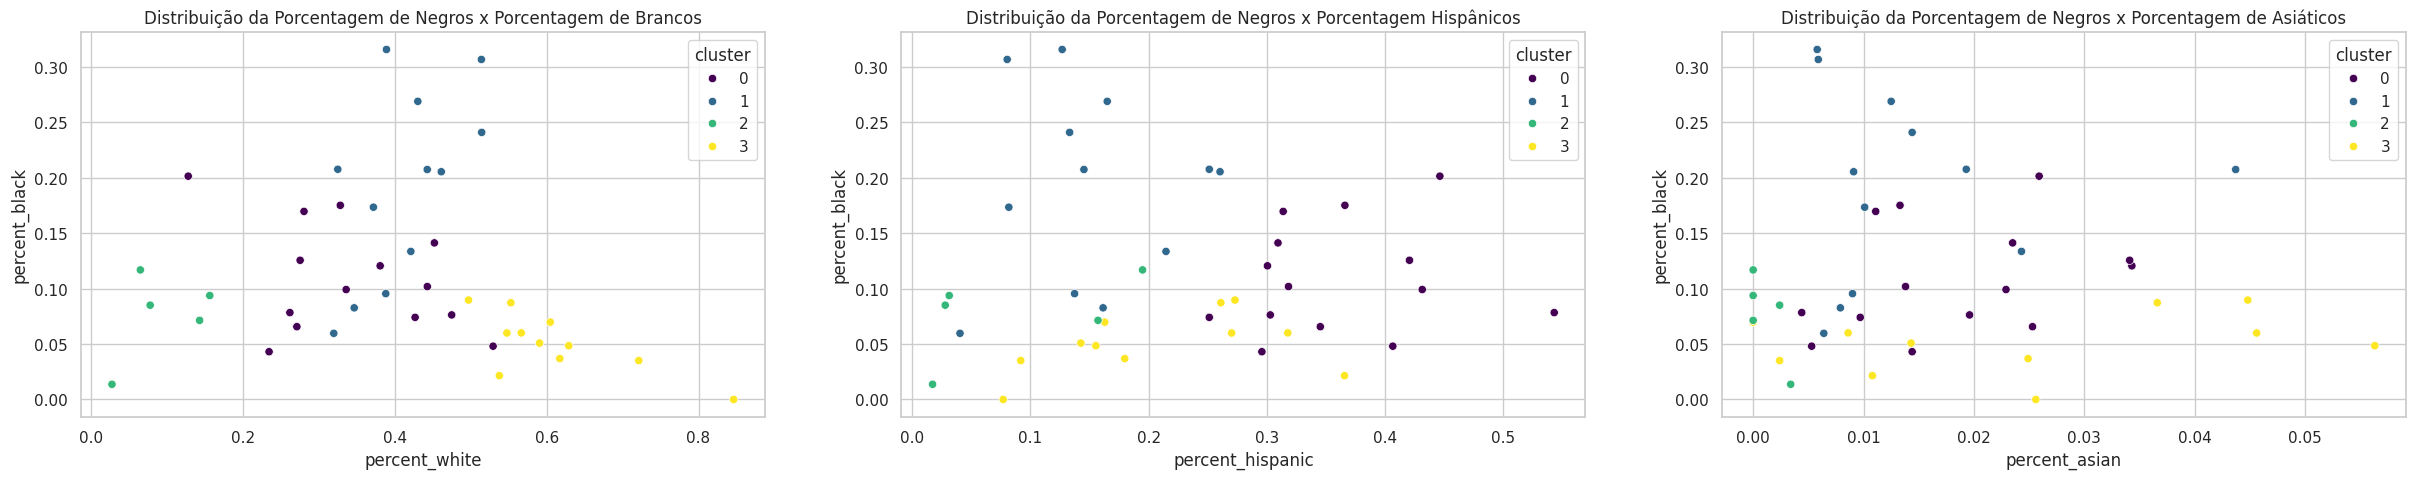

In [ ]:
plt.figure(figsize=(10, 8))
# Visualizando os clusters/grupo faculdades
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
sns.scatterplot(data=dado_selecionado, x='percent_white', y='percent_black', hue='cluster', palette='viridis', ax=axes[0]).set_title('Distribuição da Porcentagem de Negros x Porcentagem de Brancos')
sns.scatterplot(data=dado_selecionado, x='percent_hispanic', y='percent_black', hue='cluster', palette='viridis', ax=axes[1]).set_title('Distribuição da Porcentagem de Negros x Porcentagem Hispânicos')
sns.scatterplot(data=dado_selecionado, x='percent_asian', y='percent_black', hue='cluster', palette='viridis', ax=axes[2]).set_title('Distribuição da Porcentagem de Negros x Porcentagem de Asiáticos')
plt.show()

In [ ]:
#preparando os dados para analises futuras
from sklearn.preprocessing import LabelEncoder

#usamos uma biblioteca do sklearn para transformar os dados em numero inteiros
#assim podemos aplicar o kmeans

#acessa os valores do dataframe das faculdades
#como esse df é uma copia do original entao acesso via rotulo da coluna usando o .loc
#ele filtra com base em rótulos de índice da matriz (ou rótulos de coluna).
label_encoder = LabelEncoder()
data.loc[:, 'school_name'] = label_encoder.fit_transform(data['school_name'])
data.loc[:, 'region'] = label_encoder.fit_transform(data['region'])
data.loc[:, 'city'] = label_encoder.fit_transform(data['city'])
data.loc[:, 'state'] = label_encoder.fit_transform(data['state'])

Para K = 2, o coeficiente é 0.8217
Para K = 3, o coeficiente é 0.3621
Para K = 4, o coeficiente é 0.2715
Para K = 5, o coeficiente é 0.2020
Para K = 6, o coeficiente é 0.1729
Para K = 7, o coeficiente é 0.1411
Para K = 8, o coeficiente é 0.1742
Para K = 9, o coeficiente é 0.1996
Para K = 10, o coeficiente é 0.2041
Para K = 11, o coeficiente é 0.2231
Melhor valor de k: 2 e o valor é: 0.8216975399566221


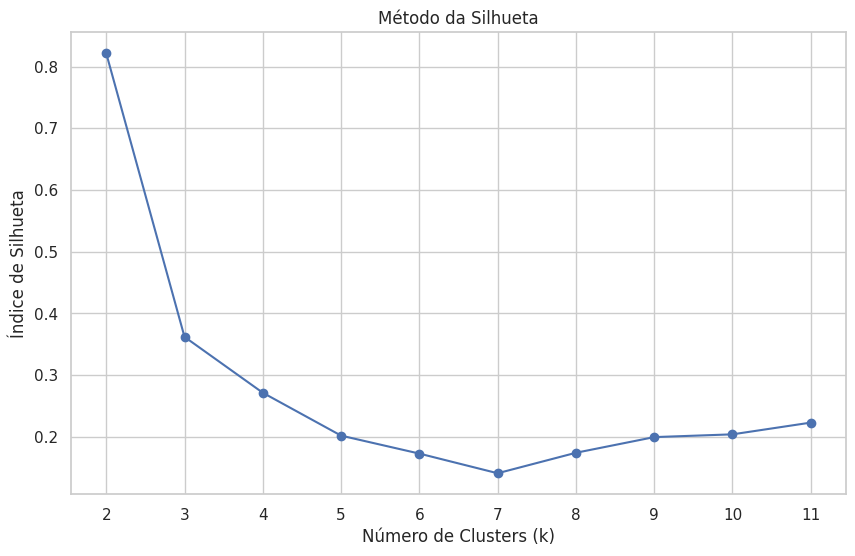

In [ ]:
silhouette_scores = []

# testar diferentes valores de k
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para K = {k}, o coeficiente é {silhouette_avg:.4f}")

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Melhor valor de k: {best_k} e o valor é: {max(silhouette_scores)}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.title('Método da Silhueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.xticks(range(2, 12))
plt.grid(True)
plt.show()

In [ ]:
# Aplicando k-means com melhor hiperparametro (k=2)
kmeans = KMeans(n_clusters=2, n_init ='auto',random_state=42)
dado_selecionado.loc[:,'cluster'] = kmeans.fit_predict(dado_selecionado)

<Figure size 1000x800 with 0 Axes>

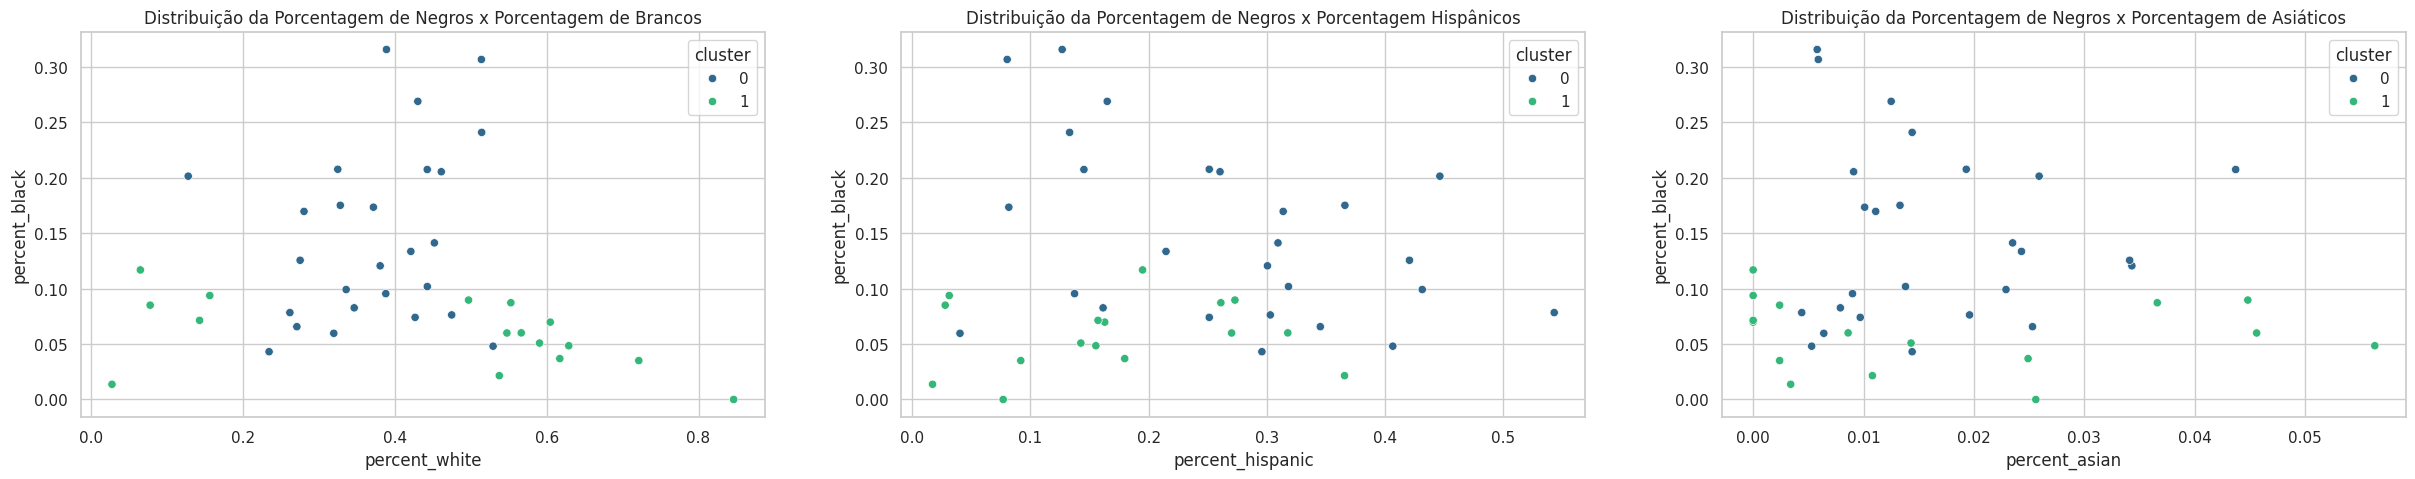

In [ ]:
plt.figure(figsize=(10, 8))
# Visualizando os clusters/grupo faculdades
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
sns.scatterplot(data=dado_selecionado, x='percent_white', y='percent_black', hue='cluster', palette='viridis', ax=axes[0]).set_title('Distribuição da Porcentagem de Negros x Porcentagem de Brancos')
sns.scatterplot(data=dado_selecionado, x='percent_hispanic', y='percent_black', hue='cluster', palette='viridis', ax=axes[1]).set_title('Distribuição da Porcentagem de Negros x Porcentagem Hispânicos')
sns.scatterplot(data=dado_selecionado, x='percent_asian', y='percent_black', hue='cluster', palette='viridis', ax=axes[2]).set_title('Distribuição da Porcentagem de Negros x Porcentagem de Asiáticos')
plt.show()